## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Customer Personality Analysis

### Loading the dataset

In [2]:
main_df = pd.read_csv('Datasets\marketing_campaign.csv', sep="\t")

df = main_df.copy()
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Exploration and Visualization

#### Data Preprocessing

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

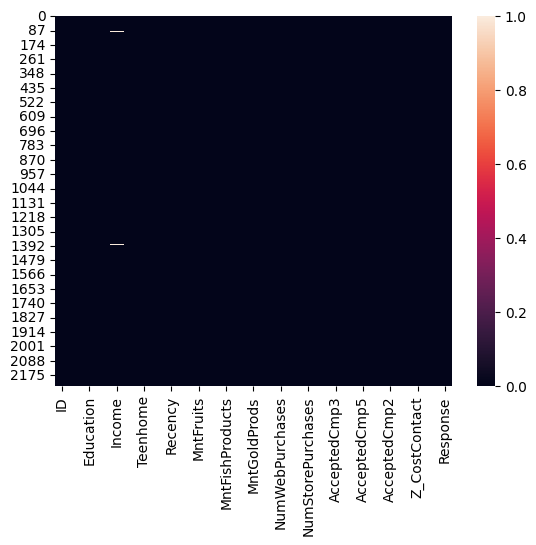

In [5]:
sns.heatmap(df.isnull())

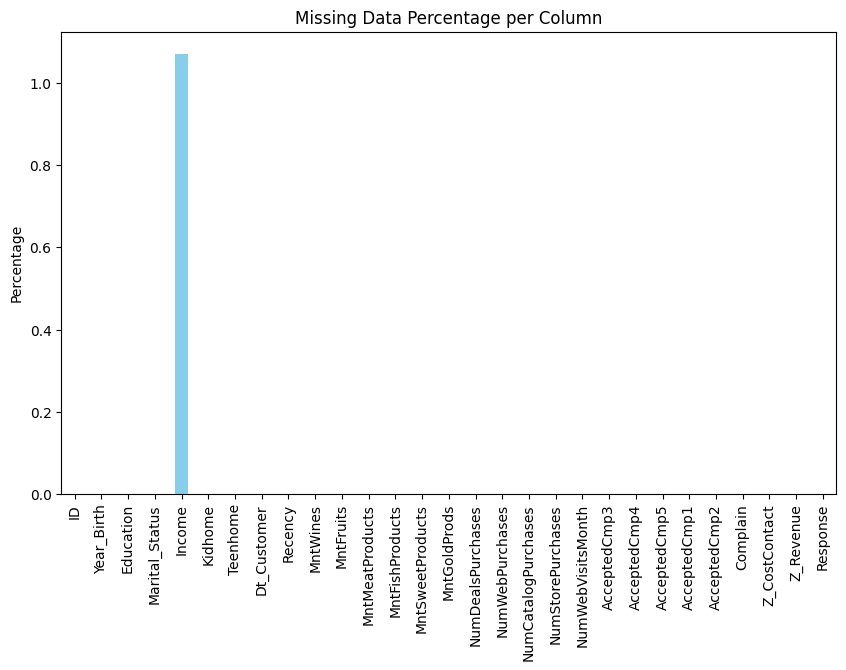

In [6]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

plt.figure(figsize=(10,6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Missing Data Percentage per Column')
plt.ylabel('Percentage')
plt.show()

**Fill the missing values of 'Income' column**

In [7]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274


**Convert 'Dt_Customer' Column to Datetime Format**

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

**Droping the unwanted features**

In [9]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


#### EDA

##### Univariate Analysis

**Analysis on 'Education' variable**

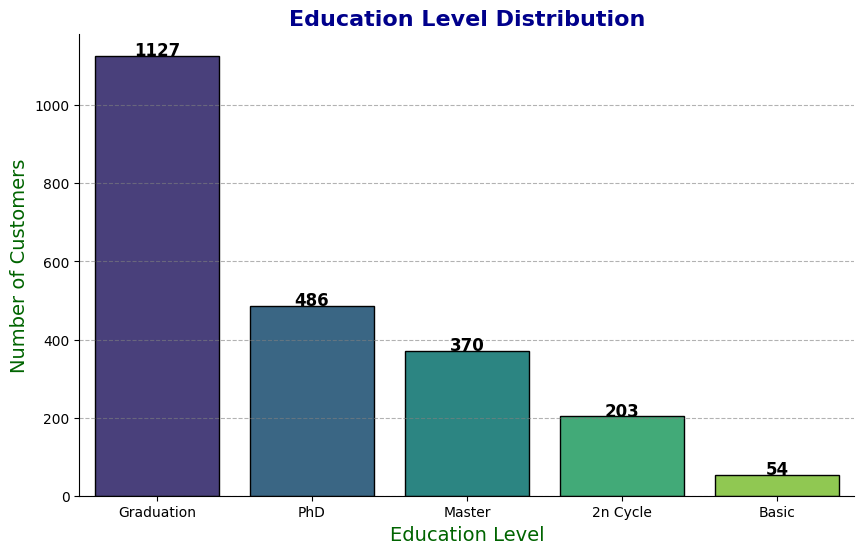

In [11]:
plt.figure(figsize=(10, 6))
education_level_counts = df['Education'].value_counts()
sns.barplot(x=education_level_counts.index, y=education_level_counts.values, palette='viridis', edgecolor='black', saturation=0.8)
plt.title('Education Level Distribution', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Education Level', fontsize=14, color='darkgreen')
plt.ylabel('Number of Customers', fontsize=14, color='darkgreen')

for i, value in enumerate(education_level_counts.values):
    plt.text(i, value + 1, f'{value}', ha='center', fontsize=12, color='black', fontweight='bold')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')
plt.show()

**Analysis On 'Marital_Status' Variable**

In [13]:
df1 = df.copy()

In [14]:
df1['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
df1['Marital_Status'] = df1['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df1['Marital_Status'] = df1['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

<Figure size 800x800 with 0 Axes>

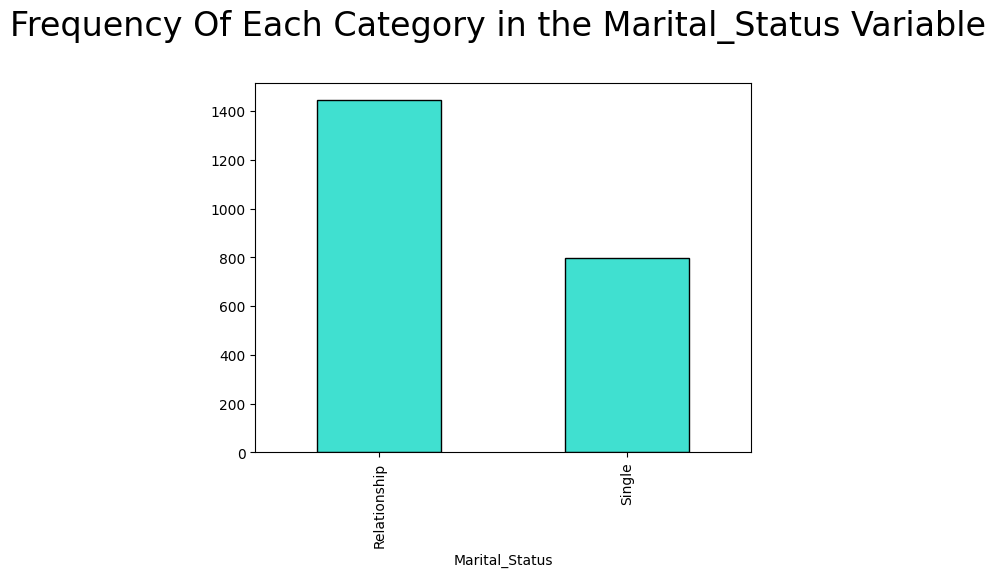

<Figure size 800x800 with 0 Axes>

In [20]:
df1['Marital_Status'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black")
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

64.46% of Customers in the dataset are in "Relationship".

35.53% of Customers in the dataset are "Single".

**Analysis On Age of Customers**

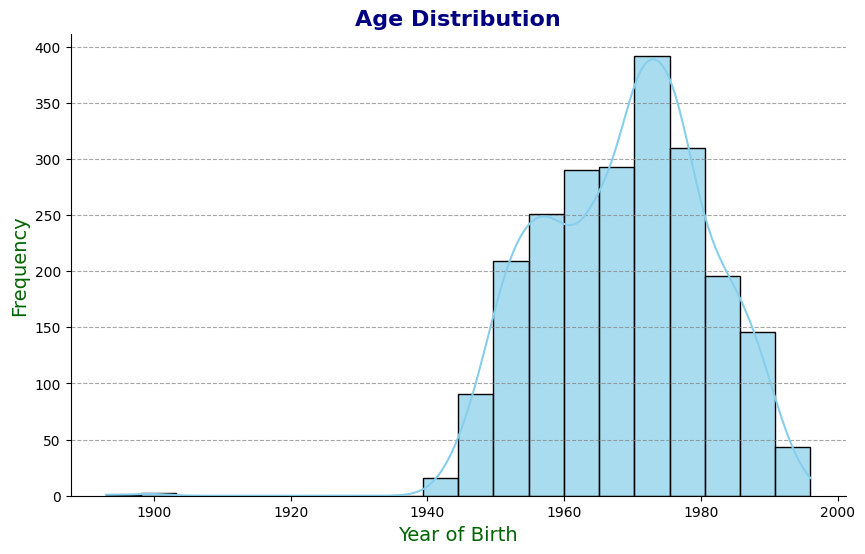

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Year of Birth', fontsize=14, color='darkgreen')
plt.ylabel('Frequency', fontsize=14, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
sns.despine()
plt.show()

**Analysis On 'Income' Variable**

In [24]:
print(df['Income'].max())

666666.0


In [25]:
print(df['Income'].min())

1730.0


In [26]:
print(df['Income'].mean())

52247.25135379061


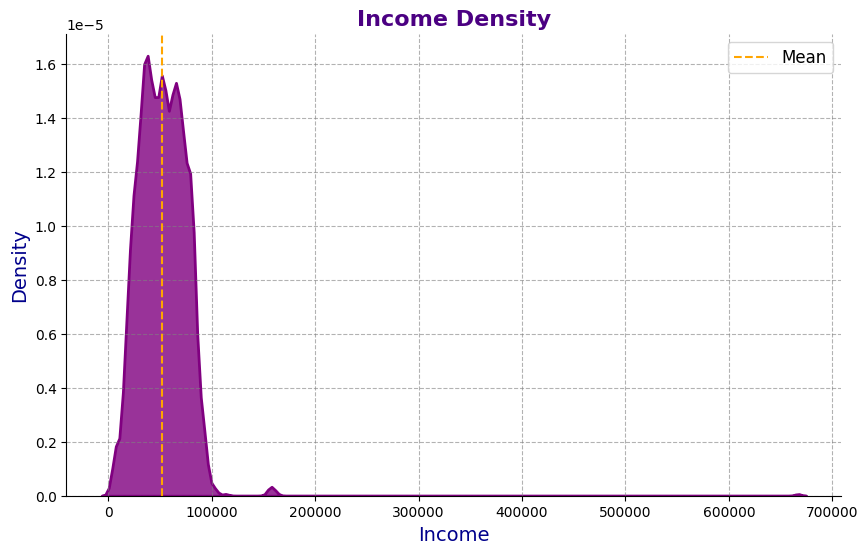

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Income'], fill=True, color='purple', alpha=0.8, linewidth=2, bw_adjust=0.5)
plt.title('Income Density', fontsize=16, fontweight='bold', color='indigo')
plt.xlabel('Income', fontsize=14, color='darkblue')
plt.ylabel('Density', fontsize=14, color='darkblue')
plt.grid(axis='both', linestyle='--', alpha=0.6, color='gray')
sns.despine()
plt.axvline(x=np.mean(df['Income']), color='orange', linestyle='--', linewidth=1.5, label='Mean')
plt.legend(fontsize=12)
plt.show()

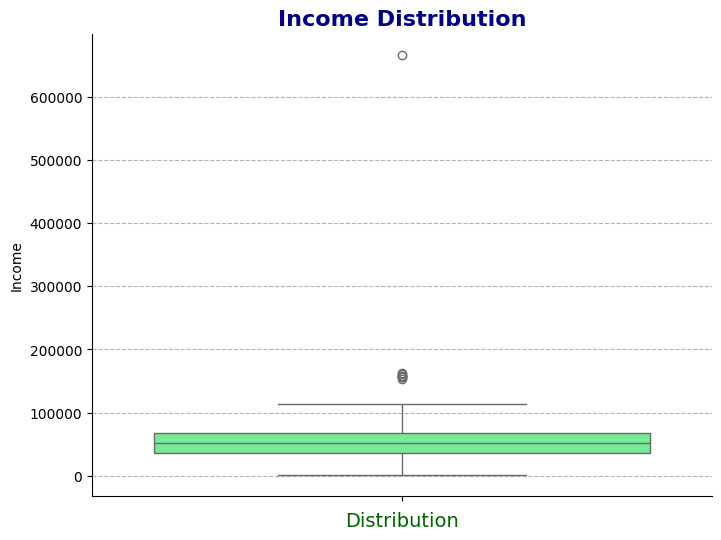

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Income'], color='#65fc8d')
plt.title('Income Distribution', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Distribution', fontsize=14, color='darkgreen')
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')
plt.show()

**Analysis On "Kidhome,Teenhome" Variables**

In [29]:
df['Kidhome'].unique()

array([0, 1, 2])

In [30]:
df['Teenhome'].unique()

array([0, 1, 2])

In [31]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

<Figure size 800x800 with 0 Axes>

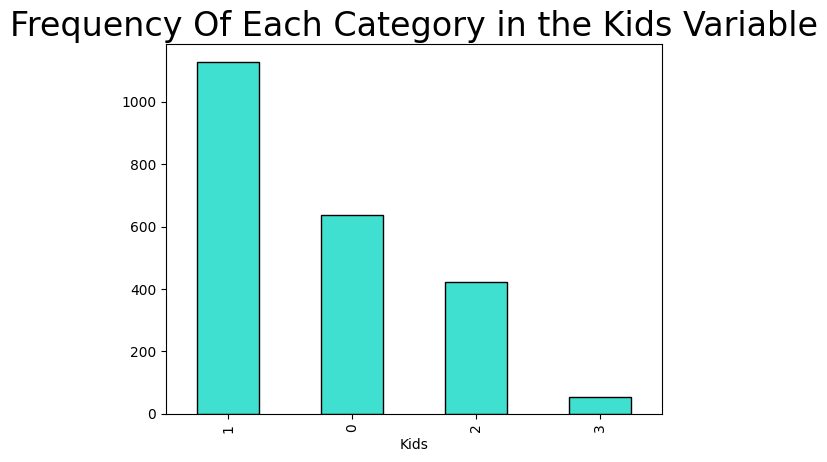

<Figure size 800x800 with 0 Axes>

In [33]:
df['Kids'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black")
plt.title("Frequency Of Each Category in the Kids Variable",fontsize=24)
plt.figure(figsize=(8,8))

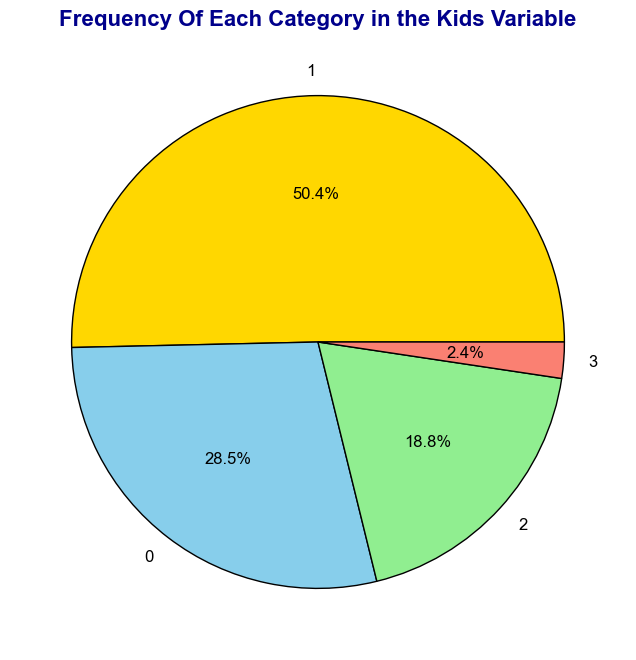

In [67]:
colors = ['gold', 'skyblue', 'lightgreen', 'salmon']
kids_counts = df['Kids'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    kids_counts.values,
    labels=kids_counts.index,
    colors=colors[:len(kids_counts)], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12, 'color': 'black'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Frequency Of Each Category in the Kids Variable', fontsize=16, fontweight='bold', color='darkblue')
plt.show()

50.4% of Customers in the dataset have 1 kid.

28.5% of Customers in the dataset have no kids.

18.8% of Customers in the dataset have 2 kids.

2.4% of Customers in the dataset have 3 kids.

**Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variables**

In [34]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(5)

0    1617
1      27
2     776
3      53
4     422
Name: Expenses, dtype: int64

In [36]:
print(df['Expenses'].min())

5


In [37]:
print(df['Expenses'].max())

2525


In [38]:
print(df['Expenses'].mean())

605.7982142857143


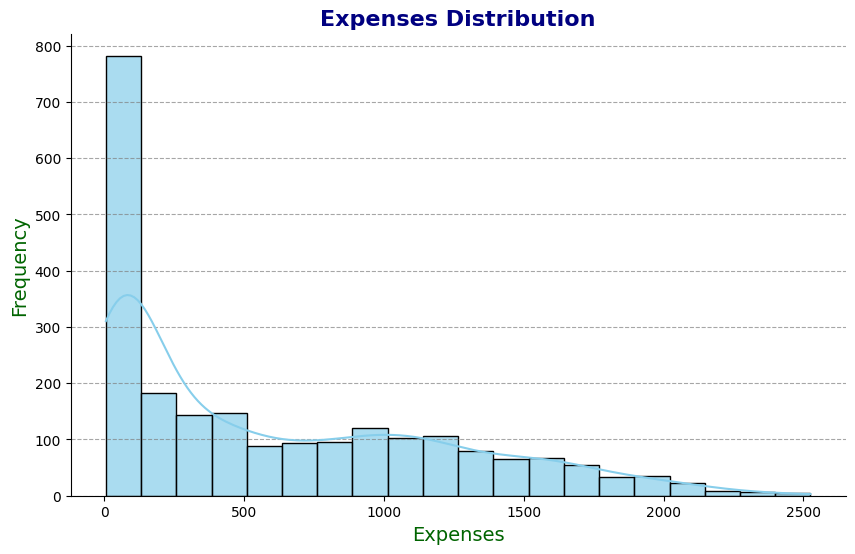

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Expenses'], bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Expenses Distribution', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Expenses', fontsize=14, color='darkgreen')
plt.ylabel('Frequency', fontsize=14, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
sns.despine()
plt.show()

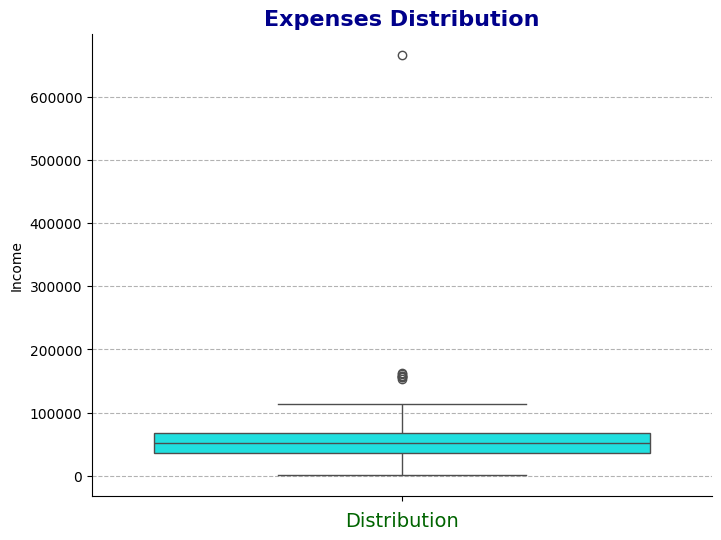

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Income'], color='cyan')
plt.title('Expenses Distribution', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Distribution', fontsize=14, color='darkgreen')
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')
plt.show()

**Analysis On Online Purchases and Store Purchases**

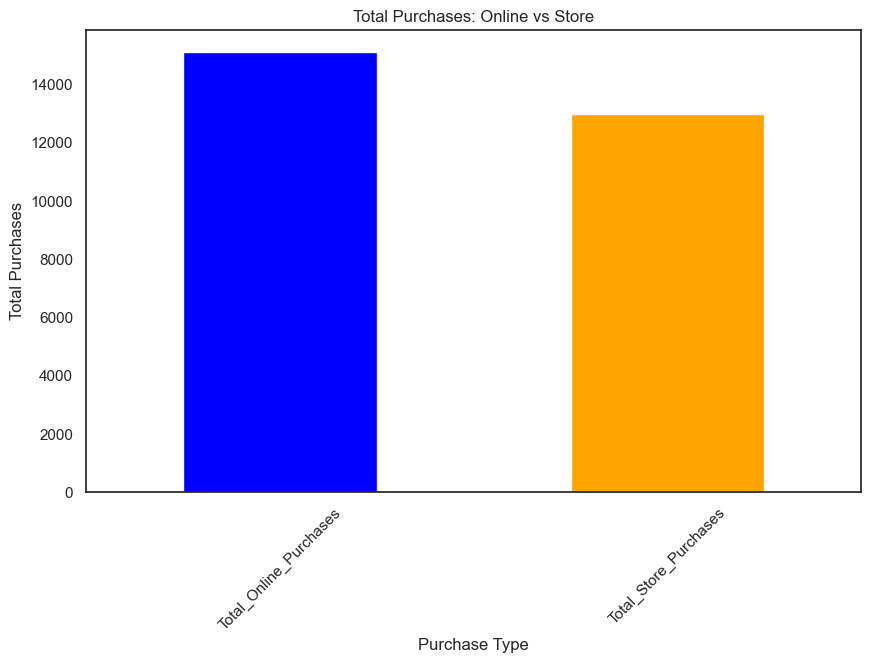

In [81]:
df['Total_Online_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
df['Total_Store_Purchases'] = df['NumStorePurchases']

online_vs_store = df[['Total_Online_Purchases', 'Total_Store_Purchases']].sum()
plt.figure(figsize=(10,6))
online_vs_store.plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Purchases: Online vs Store')
plt.xlabel('Purchase Type')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.show()

**Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variables**

In [44]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

<Figure size 800x800 with 0 Axes>

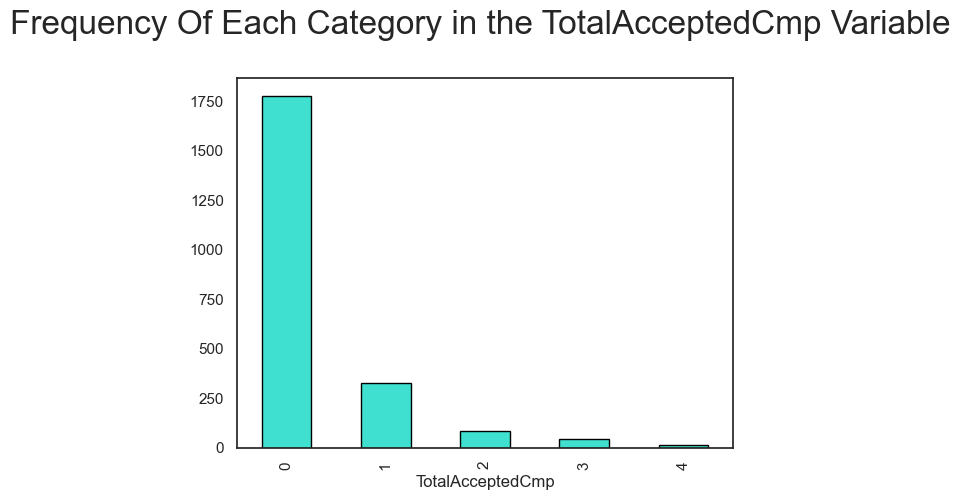

<Figure size 800x800 with 0 Axes>

In [82]:
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black")
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

79.33% of Customers accepted the offer in the campaign are "0".

14.50% of Customers accepted the offer in the campaign are "1".

3.70% of Customers accepted the offer in the campaign are "2".

1.96% of Customers accepted the offer in the campaign are "3".

0.49% of Customers accepted the offer in the campaign are "4".

##### Bivarite Analysis

**Analysis On Education vs Expenses**

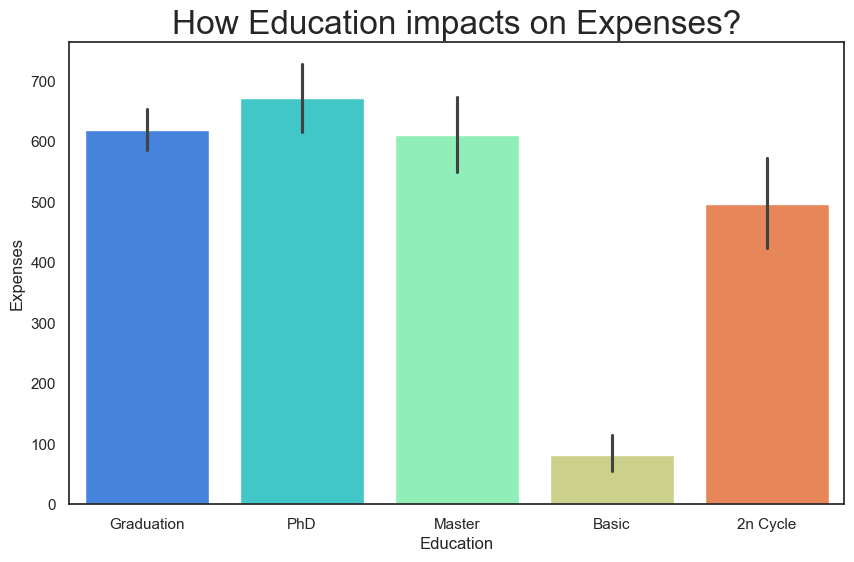

In [83]:
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df, palette="rainbow")

**Analysis On Education vs Income**

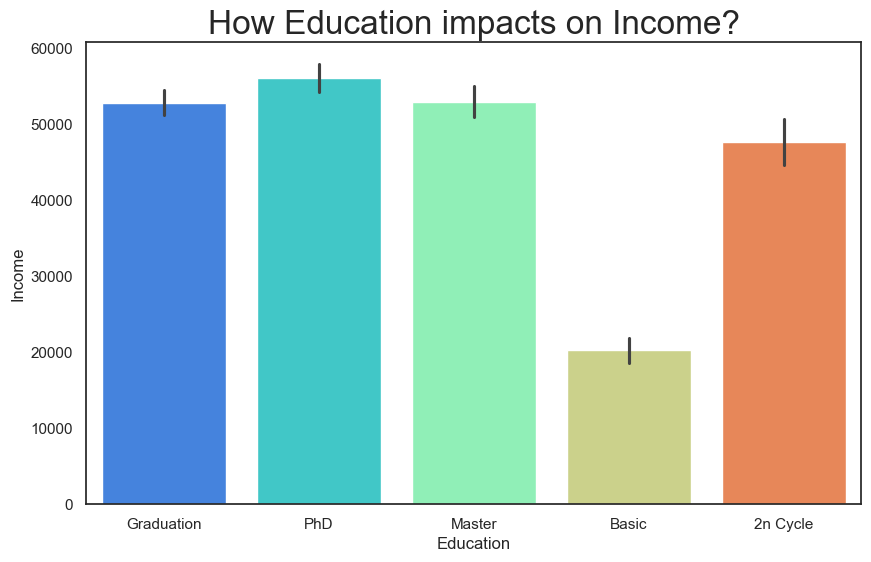

In [84]:
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
plt.title("How Education impacts on Income?",fontsize=24)
ax = sns.barplot(x="Education", y="Income", data=df, palette="rainbow")

**Analysis On Marital Status vs Expenses**

In [50]:
df2 = df.copy()

In [51]:
df2['Marital_Status'] = df2['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df2['Marital_Status'] = df2['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

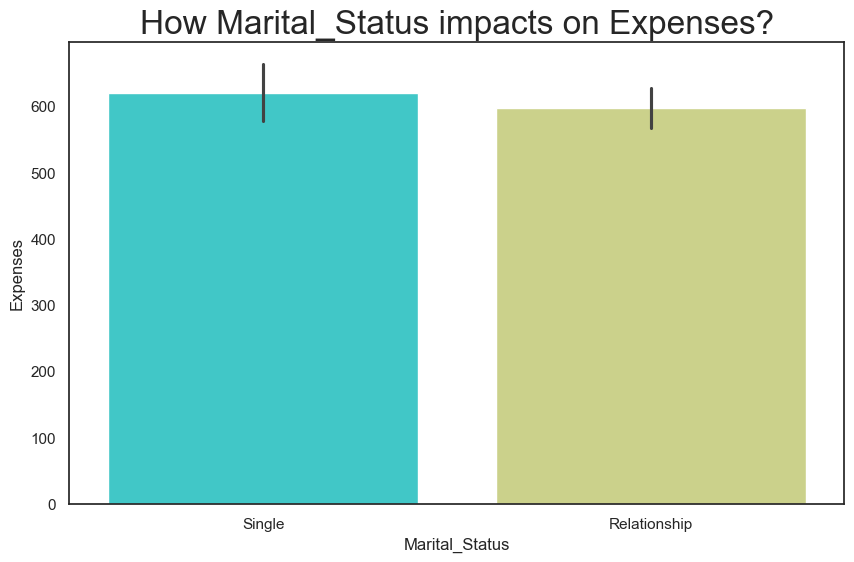

In [52]:
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df2, palette="rainbow")

**Analysis On Kids vs Expenses**

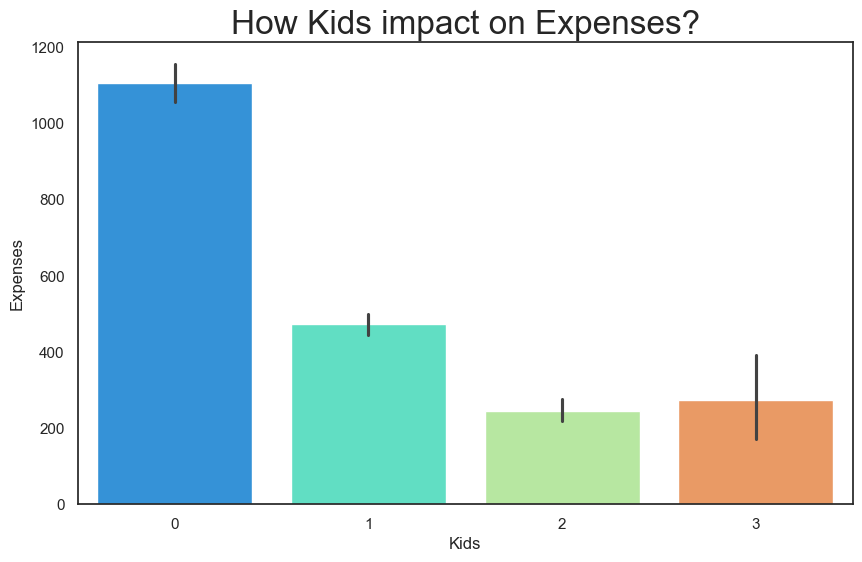

In [57]:
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
plt.title("How Kids impact on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=df, palette="rainbow")

**Analysis On Age vs Expenses**

In [59]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

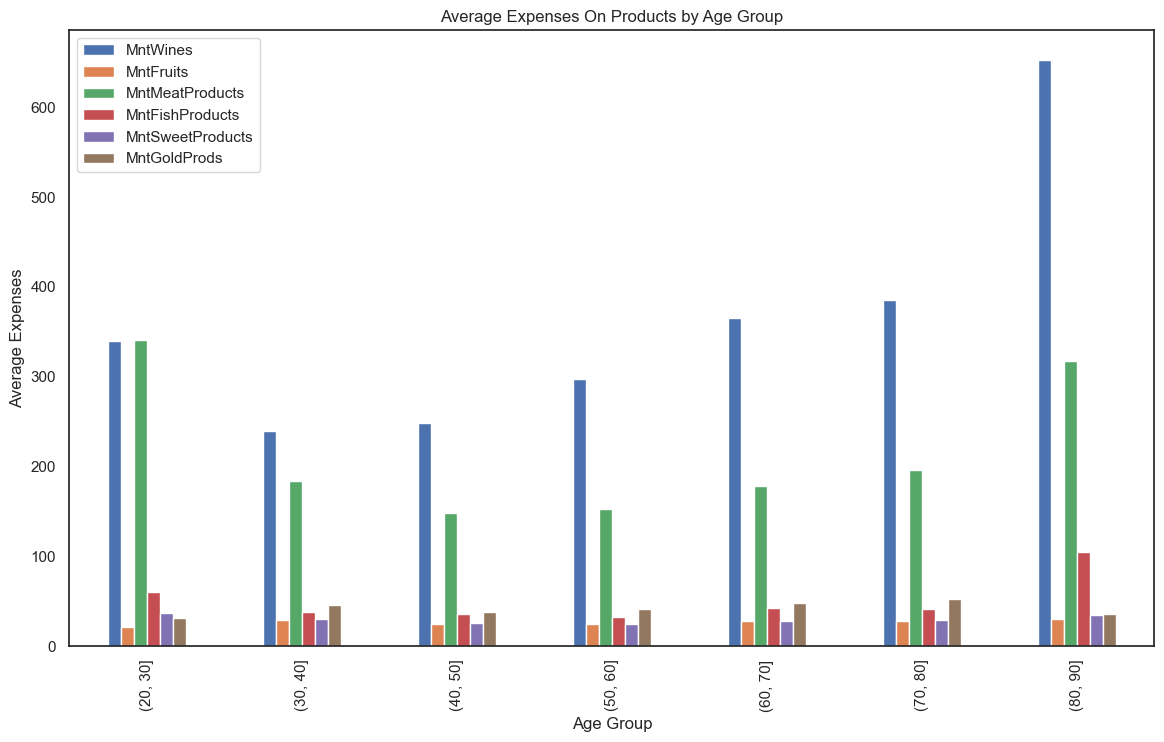

In [60]:
df['Age'] = 2024 - df['Year_Birth']
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

expenses_by_age = df.groupby('Age_Group')[products].mean()
expenses_by_age.plot(kind='bar', figsize=(14,8))
plt.title('Average Expenses On Products by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Expenses')
plt.show()

**Relationship between a customer's income and the number of online purchases**

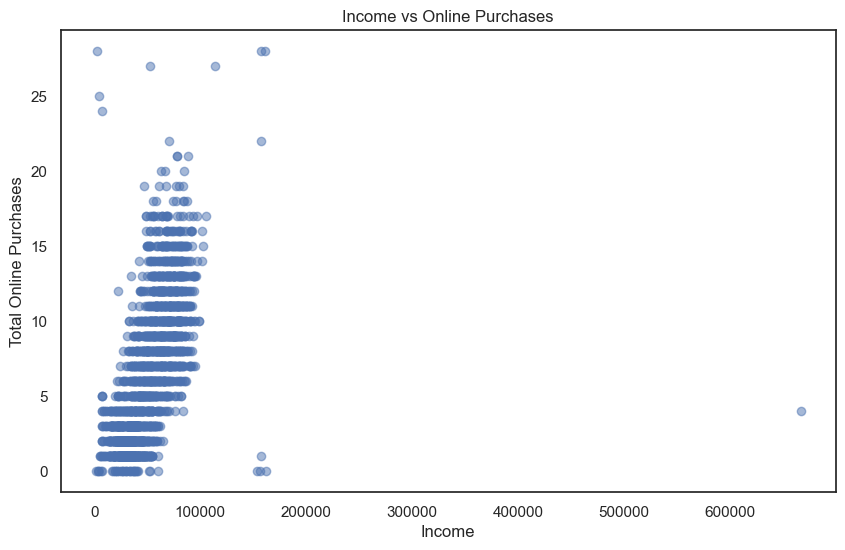

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(df['Income'], df['Total_Online_Purchases'], alpha=0.5)
plt.title('Income vs Online Purchases')
plt.xlabel('Income')
plt.ylabel('Total Online Purchases')
plt.show()

**Relationship between age and the number of monthly visits to the site**

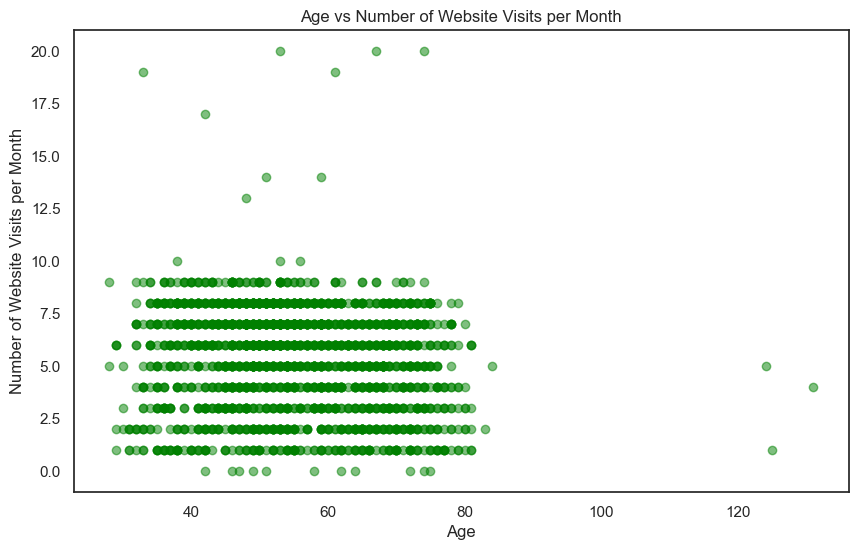

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['NumWebVisitsMonth'], alpha=0.5, color='green')
plt.title('Age vs Number of Website Visits per Month')
plt.xlabel('Age')
plt.ylabel('Number of Website Visits per Month')
plt.show()

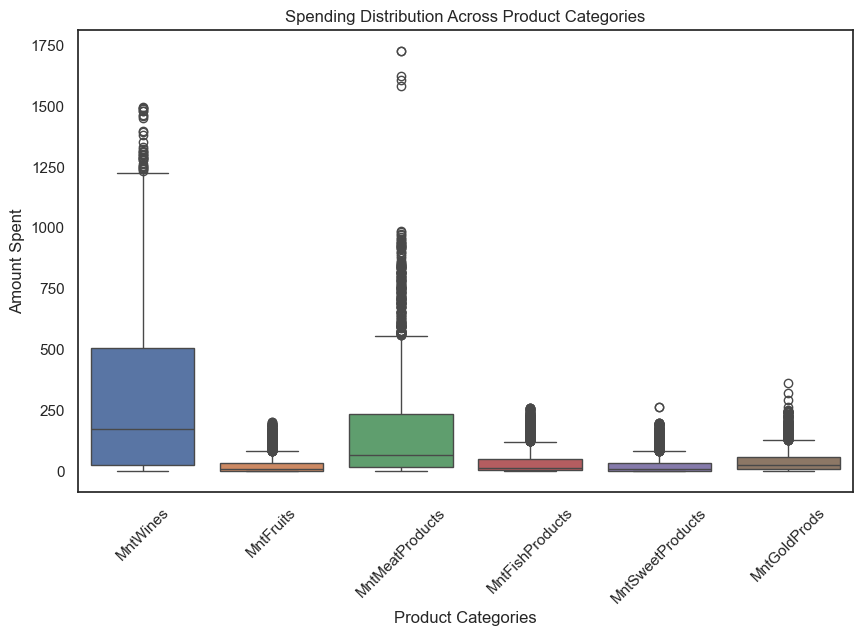

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.title("Spending Distribution Across Product Categories")
plt.ylabel("Amount Spent")
plt.xlabel("Product Categories")
plt.xticks(rotation=45)
plt.show()

In [87]:
numerical_columns = ['Income', 'Recency', 'Age', 'Complain', 'Response',
                     'Kids', 'Expenses', 'Total_Online_Purchases', 'Total_Store_Purchases', 'TotalAcceptedCmp'] 
correlation_matrix= df[numerical_columns].corr()
correlation_matrix

,Income,Recency,Age,Complain,Response,Kids,Expenses,Total_Online_Purchases,Total_Store_Purchases,TotalAcceptedCmp
Income,1.000000,-0.003946,0.160942,-0.027223,0.132756,-0.290712,0.664706,0.585634,0.526489,0.307098
Recency,-0.003946,1.000000,0.019871,0.013231,-0.198437,0.018053,0.020433,0.009209,0.000799,-0.012570
Age,0.160942,0.019871,1.000000,0.030128,-0.021325,0.090199,0.111306,0.160011,0.128272,0.000301
Complain,-0.027223,0.013231,0.030128,1.000000,-0.001707,0.031066,-0.037058,-0.022202,-0.016524,-0.022220
Response,0.132756,-0.198437,-0.021325,-0.001707,1.000000,-0.169163,0.265298,0.223635,0.039363,0.426035
Kids,-0.290712,0.018053,0.090199,0.031066,-0.169163,1.000000,-0.498888,-0.357523,-0.321125,-0.244282
Expenses,0.664706,0.020433,0.111306,-0.037058,0.265298,-0.498888,1.000000,0.785846,0.674669,0.459554
Total_Online_Purchases,0.585634,0.009209,0.160011,-0.022202,0.223635,-0.357523,0.785846,1.000000,0.615359,0.325953
Total_Store_Purchases,0.526489,0.000799,0.128272,-0.016524,0.039363,-0.321125,0.674669,0.615359,1.000000,0.206557
TotalAcceptedCmp,0.307098,-0.012570,0.000301,-0.022220,0.426035,-0.244282,0.459554,0.325953,0.206557,1.000000


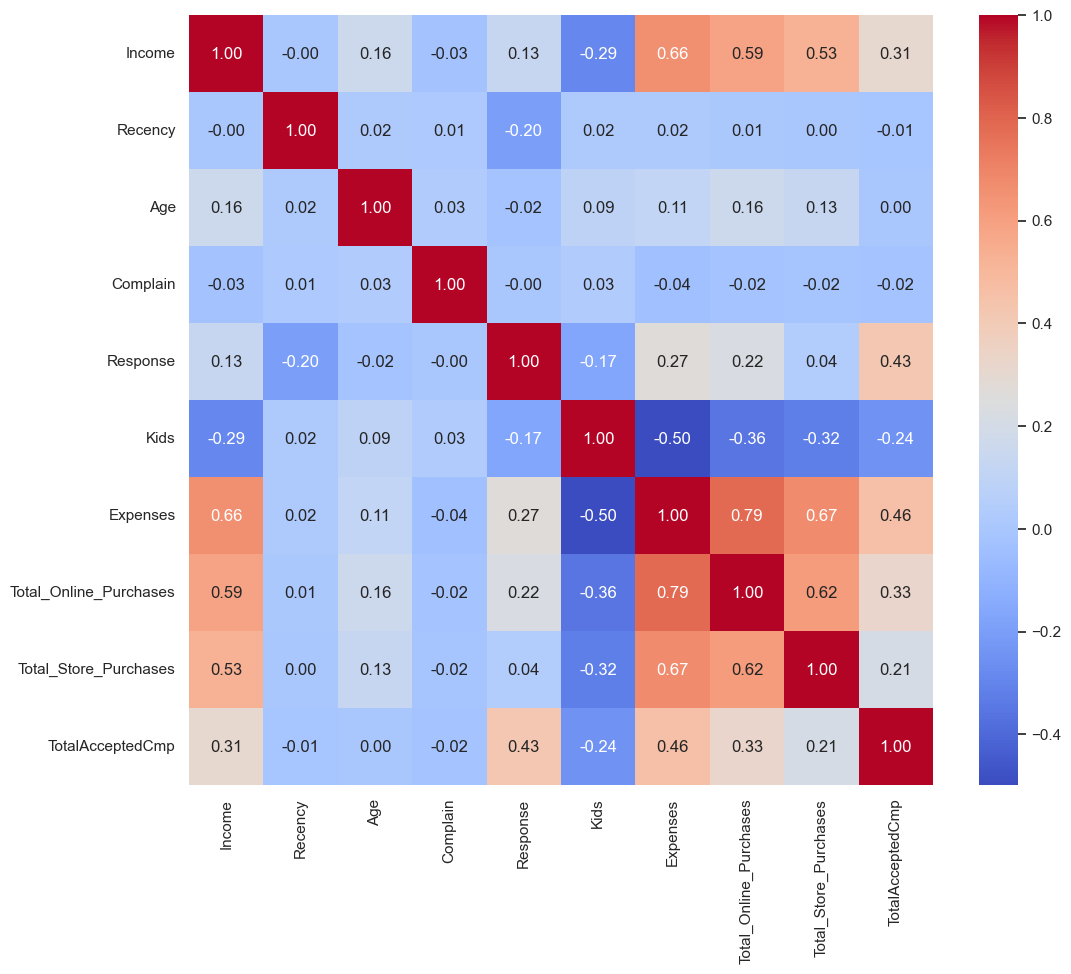

In [88]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' ,fmt=".2f")
plt.show()

### Hypothesis Tests

#### 1. Do customers from different education levels have different income levels?

In [69]:
education_groups = [df[df['Education'] == edu]['Income'] for edu in df['Education'].unique()]
stat, p = stats.kruskal(*education_groups)
print(f"Kruskal-Wallis Test: p-value = {p}")

if p < 0.05:
    print("There is a significant difference in income across education levels.")
else:
    print("No significant difference in income across education levels.")

Kruskal-Wallis Test: p-value = 8.36304508877745e-30
There is a significant difference in income across education levels.


#### 2. Does the marketing campaign influence spending behavior across customergroups?

**Check Normality**

In [71]:
stat, p = stats.shapiro(df['Expenses'])
print(f"Shapiro-Wilk Test for Normality: p-value = {p}")

Shapiro-Wilk Test for Normality: p-value = 2.7805851314632067e-40


P-value is less than 0.05, so the data is not normal. We use Mann-Whitney U Test.

In [73]:
spending_accepted = df[df['Response'] == 1]['Expenses']
spending_not_accepted = df[df['Response'] == 0]['Expenses']

stat, p = stats.mannwhitneyu(spending_accepted, spending_not_accepted)
print(f"Statistical Test: p-value = {p}")

if p < 0.05:
    print("Marketing campaign significantly influences spending behavior.")
else:
    print("No significant impact of the marketing campaign on spending behavior.")


Statistical Test: p-value = 1.441166973008032e-29
Marketing campaign significantly influences spending behavior.


#### 3. Do customers with children spend differently than those without children?

**Create a "Has_Children" Column**

In [74]:
df['Has_Children'] = (df['Kidhome'] + df['Teenhome']) > 0

In [75]:
stat, p = stats.mannwhitneyu(df[df['Has_Children'] == True]['Expenses'], 
                        df[df['Has_Children'] == False]['Expenses'])

print(f"Mann-Whitney U Test: p-value = {p}")

if p < 0.05:
    print("Customers with children spend significantly differently than those without children.")
else:
    print("No significant difference in spending between customers with and without children.")

Mann-Whitney U Test: p-value = 7.304969252881198e-108
Customers with children spend significantly differently than those without children.


#### 4. Is there a significant difference in spending on different product categories?

In [79]:
stat, p = stats.friedmanchisquare(df['MntWines'], df['MntFruits'], df['MntMeatProducts'], 
                            df['MntFishProducts'], df['MntSweetProducts'], df['MntGoldProds'])

print(f"Friedman Test: p-value = {p}")

if p < 0.05:
    print("There is a significant difference in spending across product categories.")
else:
    print("No significant difference in spending across product categories.")

Friedman Test: p-value = 0.0
There is a significant difference in spending across product categories.


#### 5. Is there a relationship between customer education level and acceptance of promotional campaigns?

In [80]:
contingency_table = pd.crosstab(df['Education'], df['Response'])
stat, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test: p-value = {p}")

if p < 0.05:
    print("Education level is significantly related to promotional campaign acceptance.")
else:
    print("No significant relationship between education level and promotional acceptance.")

Chi-Square Test: p-value = 0.00012226975294505314
Education level is significantly related to promotional campaign acceptance.
